# <center> Emergency Department Mortality Prediction </center>
## <center> In Patients w/ Heart Failure </center>


# Context 

Heart failure, also known as congestive heart failure, is a condition that develops when your heart doesn’t pump enough blood for your body’s needs. This can happen if your heart can’t fill up with enough blood. It can also happen when your heart is too weak to pump properly. It can occur at any age, but is most common in older people. Heart failure is a long-term condition that tends to get gradually worse over time. It cannot usually be cured, but the symptoms can often be controlled for many years with treatment such as healthy lifestyle changes, medicines, some devices, and procedures.

The burden of heart failure (HF) in the United States is considerable. In 2012, total costs for HF were estimated to be 30.7 billion dolars, with two-thirds attributed to direct medical costs. Without improvements to the cost of care by the year 2030, costs are predicted to reach 69.8 billion dolars (127% increase). This equates to approximately $244 for each US adult. This projected increase is due to an aging population and epidemiologic factors such as obesity, hypertension, diabetes mellitus, and coronary artery disease. In addition to the overall rise in number of HF cases, the complexity of the disease appears to be increasing as more comorbidities generally lead to more clinical events and hospitalizations for both HF and other causes.

Incidence of HF increases with age and is associated with poor mortality, as older adults diagnosed with HF have a 5-year mortality approaching 50%. In 2014, HF was the primary cause of 1.1 million emergency department (ED) visits, 1 million hospitalizations, and 84,000 deaths. HF was a comorbidity or contributing cause in an additional 4.1 million ED visits, 3.4 million hospitalizations, and 231,000 deaths and was associated with significantly higher costs compared with patients without HF as a listed comorbidity. In 2014, the estimated mean cost of HF hospitalizations was 11,552 dolars, with a total estimated cost of more than 11 billion dolars. Although HF greatly affects older adults, the costs are also significant when treating HF comorbidities and HF exacerbations in younger populations, totaling $1 billion in inpatient costs, which may be rising.





# Question

In the Emergency Department (ED), the decisions need to be fast and with a restricted information. Unfortunately, some ED are full of pacients, and there isn't sufficient staff to reavaliate them. Is there a way to signalize the righ risk pacients of death, so they can be evaluate more frequently ??

# Data Dictionary

* `Age`
* `Age.Group`
* `Gender`: Female / Male
* `Locality` : Rural / Urban
* `Marital status` : Married / unmarried
* `Life.Style`: yes / no
* `Sleep` : problems to sleep (yes / no)
* `Category` : FREE or PAID (Paid for the appointment?)
* `Depression` : yes/no
* `Hyperlipi` : hypercholesterolemia (> 160 mg/dL) or hypertriglyceridemia (> 150 mg/dL)? - yes / no
* `Smoking` : yes/no
* `Family.History` : yes/no
* `F.History` : the same of previous variable, but in binary
* `Diabetes` : 1(yes)/ 0(no)
* `HTN` : Hypertension - yes/no
* `Allergies`: yes/no
* `BP` : Systolic Blood Pressure (mmHg) 
* `Thrombolysis` : History of thrombolysis - yes/no
* `BGR`: Blood Glucose 
* `B.Urea`
* `S.Cr` : Serum Creatinine 
* `S.Sodium` : Serum Sodium 
* `S.Potassium` : Serum Potassium 
* `S.Chloride` : Serum Chloride 
* `C.P.K` : Creatine Phosphokinase 
* `CK.MB` : Creatine Phosphokinase MB
* `ESR`: Erythrocyte Sedimentation Rate 
* `WBC`: White Blood Count 
* `RBC`: Red Blood Count 
* `Hemoglobin`
* `P.C.V`: Packed Cell Volume 
* `M.C.V`: Mean Corpuscular Volume 
* `M.C.H`: Mean Corpuscular Hemoglobin 
* `M.C.H.C`: Mean Corpuscular Hemoglobin Concentration 
* `PLATELET_COUNT`
* `NEUTROPHIL`
* `LYMPHO`
* `MONOCYTE`
* `EOSINO`
* `Others`
* `CO`
* `Diagnosis`: Type of Diagnosis 
* `Hypersensitivity`
* `cp` : Chest Pain type chest pain type
-- Value 1: typical angina</br>
-- Value 2: atypical angina</br>
-- Value 3: non-anginal pain</br>
-- Value 4: asymptomatic
* `trestbps` : resting blood pressure (in mm Hg)
* `chol` : cholesterol in mg/dl
* `fbs` : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* `restecg` : resting electrocardiographic results </br>
-- Value 0: normal</br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</br>
* `thalach` : maximum heart rate achieved
* `exang`: exang: exercise induced angina (1 = yes; 0 = no)
* `oldpeak`: oldpeak = ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment </br>
-- Value 1: upsloping</br>
-- Value 2: flat</br>
-- Value 3: downsloping</br>
* `ca`: number of major vessels (0-3) colored by flourosopy
* `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect
* `num`: diagnosis of heart disease (angiographic disease status)<br/>
-- Value 0: < 50% diameter narrowing<br/>
-- Value 1: > 50% diameter narrowing<br/>
* `SK`: Streptokinase - yes(1) / no(0)
* `SK.React`: Streptokinase Reaction - yes/no
* `Reaction`: which reaction if presents
* `Mortality`
* `Follow.Up`

# Exploratory Data Analysis

## Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve, roc_auc_score

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mulheres-em-ia/bootcamp-mia-2022/main/6.%20Classifica%C3%A7%C3%A3o%201/heart_failure_predict.csv")

In [3]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [4]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [5]:
df.shape

(368, 60)

The dataset contains 368 rows and 60 columns

In [6]:
# Select only the columns that is possible to have the data in the admission into the Emergency Department
df = df[["Age", "Gender", "Locality  ", "Marital status                       ", "Life.Style                                                                              ",
         "Sleep", "Category", "Depression", "Hyperlipi", "Smoking", "F.History", "Diabetes", "HTN", 
 "Allergies", "BP", "Thrombolysis", "BGR", "cp", "Mortality"]]

In [7]:
df.head()

,Age,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,cp,Mortality
0,45,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,0,1,NO,NO,100.6,0,84,4,0
1,51,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,0,0,NO,NO,90.6,0,135,4,0
2,55,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,0,1,YES,NO,100.7,0,146,4,0
3,55,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,0,1,YES,NO,160.1,0,146,4,0
4,56,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,0,1,YES,NO,90.6,0,85,4,0


In [8]:
df.shape

(368, 19)

The dataset contains 368 rows and 19 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 19 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Gender                                                                                    368 non-null    object 
 2   Locality                                                                                  368 non-null    object 
 3   Marital status                                                                            368 non-null    object 
 4   Life.Style                                                                                368 non-null    object 
 5   Sleep                                                    

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,368.0,54.293478,8.718158,24.0,50.75,55.0,60.25,77.00
F.History,368.0,0.195652,0.397242,0.0,0.00,0.0,0.00,1.00
Diabetes,368.0,0.461957,0.499229,0.0,0.00,0.0,1.00,1.00
BP,368.0,121.213315,24.539205,80.5,100.70,120.8,140.70,190.11
Thrombolysis,368.0,0.032609,0.177852,0.0,0.00,0.0,0.00,1.00
BGR,368.0,219.991848,139.337387,60.0,117.00,164.0,291.00,563.00
cp,368.0,3.671196,0.772862,1.0,4.00,4.0,4.00,4.00
Mortality,368.0,0.217391,0.413033,0.0,0.00,0.0,0.00,1.00


## Age 


In [11]:
# Creating a secondary dataset sorted by Age, for a better visualization
df_sorted_age = df.sort_values("Age")

In [12]:
fig=px.histogram(df_sorted_age, 
                 x="Mortality",
                 color="Age",
                 hover_data=df_sorted_age.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Gender

In [13]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Gender",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Locality

In [14]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Locality  ",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Marital Status

In [15]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Marital status                       ",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

This means that a protective factor of Heart Failure death is not get married ?? NOOO. This means that the older people have a bigger probability to die of heart failure, and they also have a bigger probability to be married? Maybe 

## Life Style

I'm still not sure what does it means 

In [16]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Life.Style                                                                              ",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Sleep

In [17]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Sleep",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Category

I still don't know if this means that the pacient paid for the appointment

In [18]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Category",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Depression

In [19]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Depression",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

Chocked with this numbers. We can't know the causality just by looking at this data, but the Heart Failure have the capability to reduce de quality of life.

In [20]:
df["Depression"].value_counts() / df.shape[0] * 100 

YES    95.380435
NO      4.619565
Name: Depression, dtype: float64

In [21]:
df.groupby("Mortality")["Depression"].value_counts() / df.shape[0] * 100 

Mortality  Depression
0          YES           74.184783
           NO             4.076087
1          YES           21.195652
           NO             0.543478
Name: Depression, dtype: float64

In [22]:
# Creating 2 variables with the total number os pacients alive and dead
num_alive = df.loc[df["Mortality"] == 0].shape[0]
num_deaths = df.loc[df["Mortality"] == 1].shape[0]

In [23]:
df.loc[df["Mortality"] == 0]["Depression"].value_counts() / num_alive * 100

YES    94.791667
NO      5.208333
Name: Depression, dtype: float64

In [24]:
df.loc[df["Mortality"] == 1]["Depression"].value_counts() / num_deaths * 100

YES    97.5
NO      2.5
Name: Depression, dtype: float64

## Hyperlipi

In [25]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Hyperlipi",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Smoking

In [26]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Smoking",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Family History

In [27]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="F.History",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

In [28]:
df.loc[df["Mortality"] == 0]["F.History"].value_counts() 

0    224
1     64
Name: F.History, dtype: int64

In [29]:
df.loc[df["Mortality"] == 0]["F.History"].value_counts() / num_alive * 100

0    77.777778
1    22.222222
Name: F.History, dtype: float64

In [30]:
df.loc[df["Mortality"] == 1]["F.History"].value_counts() 

0    72
1     8
Name: F.History, dtype: int64

In [31]:
df.loc[df["Mortality"] == 0]["F.History"].value_counts() / num_deaths * 100

0    280.0
1     80.0
Name: F.History, dtype: float64

## Diabetes

In [32]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Diabetes",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

In [33]:
df.loc[df["Mortality"] == 0]["Diabetes"].value_counts()

0    179
1    109
Name: Diabetes, dtype: int64

In [34]:
# For the pacients that are alive, what the proportion of diabetes
df.loc[df["Mortality"] == 0]["Diabetes"].value_counts() / num_alive * 100

0    62.152778
1    37.847222
Name: Diabetes, dtype: float64

In [35]:
df.loc[df["Mortality"] == 1]["Diabetes"].value_counts() 

1    61
0    19
Name: Diabetes, dtype: int64

In [36]:
# For the pacients that died, what the proportion of diabetes
df.loc[df["Mortality"] == 1]["Diabetes"].value_counts() / num_deaths * 100

1    76.25
0    23.75
Name: Diabetes, dtype: float64

## Hypertension (HTN)

In [37]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="HTN",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Allergies

In [38]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Allergies",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## Blood Pressure (BP)

In [39]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="BP",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

In [40]:
# Pacients Alive X Blood Pressure
a = df.loc[(df["Mortality"] == 0) & (df["BP"] < 90)].shape[0]
a_perc = df.loc[(df["Mortality"] == 0) & (df["BP"] < 90)].shape[0] / num_alive * 100
b = df.loc[(df["Mortality"] == 0) & (df["BP"] > 90) & (df["BP"] < 140)].shape[0]
b_perc = df.loc[(df["Mortality"] == 0) & (df["BP"] > 90) & (df["BP"] < 140)].shape[0] / num_alive * 100
c = df.loc[(df["Mortality"] == 0) & (df["BP"] >= 140)].shape[0]
c_perc = df.loc[(df["Mortality"] == 0) & (df["BP"] >= 140)].shape[0] / num_alive * 100

# Pacients Dead X Blood Pressure
d = df.loc[(df["Mortality"] == 1) & (df["BP"] < 90)].shape[0]
d_perc = df.loc[(df["Mortality"] == 1) & (df["BP"] < 90)].shape[0] / num_deaths * 100
e = df.loc[(df["Mortality"] == 1) & (df["BP"] > 90) & (df["BP"] < 140)].shape[0]
e_perc = df.loc[(df["Mortality"] == 1) & (df["BP"] > 90) & (df["BP"] < 140)].shape[0] / num_deaths * 100
f = df.loc[(df["Mortality"] == 1) & (df["BP"] >= 140)].shape[0]
f_perc = df.loc[(df["Mortality"] == 1) & (df["BP"] >= 140)].shape[0] / num_deaths * 100

print("Patients that were alive and with Low Blood Pressure:", a, "->", a_perc, "%")
print("Patients that were alive and with Normal Blood Pressure:", b, "->", b_perc, "%")
print("Patients that were alive and with High Blood Pressure:", c, "->", c_perc, "%")

print("Patients that were dead and with Low Blood Pressure:", d, "->", d_perc, "%")
print("Patients that were dead and with Normal Blood Pressure:", e, "->", e_perc, "%")
print("Patients that were dead and with High Blood Pressure:", f, "->", f_perc, "%")

Patients that were alive and with Low Blood Pressure: 4 -> 1.3888888888888888 %
Patients that were alive and with Normal Blood Pressure: 209 -> 72.56944444444444 %
Patients that were alive and with High Blood Pressure: 75 -> 26.041666666666668 %
Patients that were dead and with Low Blood Pressure: 7 -> 8.75 %
Patients that were dead and with Normal Blood Pressure: 50 -> 62.5 %
Patients that were dead and with High Blood Pressure: 23 -> 28.749999999999996 %


The both extremes are higher in case of mortality. The High Blood Pressure can indicates someone that does not made a good control, While the Low Blood Pressure can indicates Cardiogenic Shock 

This is only for analysis, maybe i will be interesting to make another variable with this further 

## Thrombolysis

In [41]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="Thrombolysis",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

## BGR

In [42]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="BGR",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

I'll do the same as I did with the variable BP (Blood Pressure)

In [43]:
# Pacients Alive X Blood Glucose
bgr_a = df.loc[(df["Mortality"] == 0) & (df["BGR"] < 70)].shape[0]
bgr_a_perc = df.loc[(df["Mortality"] == 0) & (df["BGR"] < 70)].shape[0] / num_alive * 100
bgr_b = df.loc[(df["Mortality"] == 0) & (df["BGR"] >= 70) & (df["BGR"] < 100)].shape[0]
bgr_b_perc = df.loc[(df["Mortality"] == 0) & (df["BGR"] >= 70) & (df["BGR"] < 100)].shape[0] / num_alive * 100
bgr_c = df.loc[(df["Mortality"] == 0) & (df["BGR"] >= 100) & (df["BGR"] < 126)].shape[0]
bgr_c_perc = df.loc[(df["Mortality"] == 0) & (df["BGR"] >= 100) & (df["BGR"] < 126)].shape[0] / num_alive * 100
bgr_d = df.loc[(df["Mortality"] == 0) & (df["BGR"] >= 126)].shape[0]
bgr_d_perc = df.loc[(df["Mortality"] == 0) & (df["BGR"] >= 126)].shape[0] / num_alive * 100

# Pacients Dead X Blood Glucose
bgr_e = df.loc[(df["Mortality"] == 1) & (df["BGR"] < 70)].shape[0]
bgr_e_perc = df.loc[(df["Mortality"] == 1) & (df["BGR"] < 70)].shape[0] / num_deaths * 100
bgr_f = df.loc[(df["Mortality"] == 1) & (df["BGR"] >= 70) & (df["BGR"] < 100)].shape[0]
bgr_f_perc = df.loc[(df["Mortality"] == 1) & (df["BGR"] >= 70) & (df["BGR"] < 100)].shape[0] / num_deaths * 100
bgr_g = df.loc[(df["Mortality"] == 1) & (df["BGR"] >= 100) & (df["BGR"] < 126)].shape[0]
bgr_g_perc = df.loc[(df["Mortality"] == 1) & (df["BGR"] >= 100) & (df["BGR"] < 126)].shape[0] / num_deaths * 100
bgr_h = df.loc[(df["Mortality"] == 1) & (df["BGR"] >= 126)].shape[0]
bgr_h_perc = df.loc[(df["Mortality"] == 1) & (df["BGR"] >= 126)].shape[0] / num_deaths * 100

print("Patients that were alive and with Low Blood Glucose:", bgr_a, "->", bgr_a_perc, "%")
print("Patients that were alive and with Normal Blood Glucose:", bgr_b, "->", bgr_b_perc, "%")
print("Patients that were alive and with Impaired Blood Glucose (Pre Diabetes):", bgr_c, "->", bgr_c_perc, "%")
print("Patients that were alive and with High Blood Glucose (Diabetes):", bgr_d, "->", bgr_d_perc, "%")

print("Patients that were dead and with Low Blood Glucose:", bgr_e, "->", bgr_e_perc, "%")
print("Patients that were dead and with Normal Blood Glucose:", bgr_f, "->", bgr_f_perc, "%")
print("Patients that were dead and with Impaired Blood Glucose (Pre Diabetes):", bgr_g, "->", bgr_g_perc, "%")
print("Patients that were dead and with High Blood Glucose (Diabetes):", bgr_h, "->", bgr_h_perc, "%")

Patients that were alive and with Low Blood Glucose: 6 -> 2.083333333333333 %
Patients that were alive and with Normal Blood Glucose: 30 -> 10.416666666666668 %
Patients that were alive and with Impaired Blood Glucose (Pre Diabetes): 31 -> 10.76388888888889 %
Patients that were alive and with High Blood Glucose (Diabetes): 221 -> 76.73611111111111 %
Patients that were dead and with Low Blood Glucose: 4 -> 5.0 %
Patients that were dead and with Normal Blood Glucose: 21 -> 26.25 %
Patients that were dead and with Impaired Blood Glucose (Pre Diabetes): 8 -> 10.0 %
Patients that were dead and with High Blood Glucose (Diabetes): 47 -> 58.75 %


## Chest Pain (cp)

**Remember the values:** </br>
* 1: typical angina
* 2: atypical angina
* 3: non-anginal pain
* 4: asymptomatic

In [44]:
fig=px.histogram(df, 
                 x="Mortality",
                 color="cp",
                 hover_data=df.columns,
                 title="Distribution of Mortality",
                 barmode="group")
fig.show()

In [45]:
# Separate the dataset into Mortality
df_alive = df.loc[df["Mortality"] == 0]
df_dead = df.loc[df["Mortality"] == 1]

In [46]:
fig = px.pie(df_alive, names="cp", hole=.3, title="Chest Pain Type in Alive pacients")
fig.show()

In [47]:
fig = px.pie(df_dead, names="cp", hole=.3, title="Chest Pain Type in Dead pacients")
fig.show()

Despite the change of the colors, is possible to see the increase of Chest Pain type 4 percentage

# Feature Engineering

In [97]:
df2 = df.copy()

## Changing columns name

Some columns' names are with blank space 

In [98]:
df2.columns

Index(['Age', 'Gender', 'Locality  ', 'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'F.History',
       'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'cp',
       'Mortality'],
      dtype='object')

In [99]:
df2.rename(columns={'Locality  ': 'Locality',
                    'Marital status                       ': 'Marital status',
                    'Life.Style                                                                              ': 'Life.Style'},
                    inplace=True)

In [100]:
df2.columns

Index(['Age', 'Gender', 'Locality', 'Marital status', 'Life.Style', 'Sleep',
       'Category', 'Depression', 'Hyperlipi', 'Smoking', 'F.History',
       'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'cp',
       'Mortality'],
      dtype='object')

## Droping features

* Marital Status: only 3 are single 

In [101]:
df2.drop(columns="Marital status", inplace=True)

## Change categoric features

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           368 non-null    int64  
 1   Gender        368 non-null    object 
 2   Locality      368 non-null    object 
 3   Life.Style    368 non-null    object 
 4   Sleep         368 non-null    object 
 5   Category      368 non-null    object 
 6   Depression    368 non-null    object 
 7   Hyperlipi     368 non-null    object 
 8   Smoking       368 non-null    object 
 9   F.History     368 non-null    int64  
 10  Diabetes      368 non-null    int64  
 11  HTN           368 non-null    object 
 12  Allergies     368 non-null    object 
 13  BP            368 non-null    float64
 14  Thrombolysis  368 non-null    int64  
 15  BGR           368 non-null    int64  
 16  cp            368 non-null    int64  
 17  Mortality     368 non-null    int64  
dtypes: float64(1), int64(7), objec

### Gender 

In [103]:
df2["Gender"].value_counts()

Male      285
Female     83
Name: Gender, dtype: int64

In [104]:
encoder = LabelEncoder()
df2["Gender"] = encoder.fit_transform(df2["Gender"])

In [105]:
df2["Gender"].value_counts()

1    285
0     83
Name: Gender, dtype: int64

0 - Female <br/>
1 - Male

### Locality

In [106]:
df2["Locality"].value_counts()

URBAN    234
RURAL    134
Name: Locality, dtype: int64

In [107]:
df2["Locality"] = encoder.fit_transform(df2["Locality"])

In [108]:
df2["Locality"].value_counts()

1    234
0    134
Name: Locality, dtype: int64

0 - RURAL <br/>
1 - URBAN

### Life.Style

In [109]:
df2["Life.Style"].value_counts()

YES    217
NO     151
Name: Life.Style, dtype: int64

In [110]:
df2["Life.Style"] = encoder.fit_transform(df2["Life.Style"])

In [111]:
df2["Life.Style"].value_counts()

1    217
0    151
Name: Life.Style, dtype: int64

0 - NO<br/>
1 - YES

### Sleep

In [112]:
df2["Sleep"].value_counts()

NO     224
YES    144
Name: Sleep, dtype: int64

In [113]:
df2["Sleep"] = encoder.fit_transform(df2["Sleep"])

In [114]:
df2["Sleep"].value_counts()

0    224
1    144
Name: Sleep, dtype: int64

0 - NO<br/>
1 - YES

### Category

In [115]:
df2["Category"].value_counts()

FREE    331
PAID     37
Name: Category, dtype: int64

In [116]:
df2["Category"] = encoder.fit_transform(df2["Category"])

In [117]:
df2["Category"].value_counts()

0    331
1     37
Name: Category, dtype: int64

0 - FREE<br/>
1 - PAID

### Depression

In [118]:
df2["Depression"].value_counts()

YES    351
NO      17
Name: Depression, dtype: int64

In [119]:
df2["Depression"] = encoder.fit_transform(df2["Depression"])

In [120]:
df2["Depression"].value_counts()

1    351
0     17
Name: Depression, dtype: int64

0 - NO<br/>
1 - YES

### Hyperlipi

In [121]:
df2["Hyperlipi"].value_counts()

YES    341
NO      27
Name: Hyperlipi, dtype: int64

In [122]:
df2["Hyperlipi"] = encoder.fit_transform(df2["Hyperlipi"])

In [123]:
df2["Hyperlipi"].value_counts()

1    341
0     27
Name: Hyperlipi, dtype: int64

0 - NO<br/>
1 - YES

### Smoking

In [124]:
df2["Smoking"].value_counts()

YES    195
NO     173
Name: Smoking, dtype: int64

In [125]:
df2["Smoking"] = encoder.fit_transform(df2["Smoking"])

In [126]:
df2["Smoking"].value_counts()

1    195
0    173
Name: Smoking, dtype: int64

0 - NO<br/>
1 - YES

### HTN

In [127]:
df2["HTN"].value_counts()

YES    201
NO     167
Name: HTN, dtype: int64

In [128]:
df2["HTN"] = encoder.fit_transform(df2["HTN"])

In [129]:
df2["HTN"].value_counts()

1    201
0    167
Name: HTN, dtype: int64

0 - NO<br/>
1 - YES

### Allergies

In [130]:
df2["Allergies"].value_counts()

NO     357
YES     11
Name: Allergies, dtype: int64

In [131]:
df2["Allergies"] = encoder.fit_transform(df2["Allergies"])

In [132]:
df2["Allergies"].value_counts()

0    357
1     11
Name: Allergies, dtype: int64

0 - NO<br/>
1 - YES

## Separando Features de Target

In [139]:
# DataFrame apenas com as Features
x = df2.copy()
x.drop(columns="Mortality", inplace=True)

In [140]:
x.shape

(368, 17)

In [141]:
df2.shape

(368, 18)

In [142]:
# DataFrame com o target 
y = df2["Mortality"]

In [143]:
y.shape

(368,)

## Normalizando os dados


In [144]:
from sklearn.preprocessing import normalize

In [145]:
x.head()

,Age,Gender,Locality,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,cp
0,45,0,0,0,0,0,1,1,0,0,1,0,0,100.6,0,84,4
1,51,0,1,0,0,0,1,1,0,0,0,0,0,90.6,0,135,4
2,55,0,0,1,1,0,1,1,0,0,1,1,0,100.7,0,146,4
3,55,0,0,1,1,0,1,1,0,0,1,1,0,160.1,0,146,4
4,56,0,0,1,0,0,1,1,0,0,1,1,0,90.6,0,85,4


In [146]:
# Importar o StandardScaler e normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [147]:
x.head()

,Age,Gender,Locality,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,cp
0,-1.067442,-1.853034,-1.321465,-1.198785,-0.801784,-0.334339,0.220075,0.281387,-1.061682,-0.493197,1.079215,-1.097084,-0.175534,-0.841159,-0.183597,-0.977318,0.426017
1,-0.378287,-1.853034,0.756736,-1.198785,-0.801784,-0.334339,0.220075,0.281387,-1.061682,-0.493197,-0.926599,-1.097084,-0.175534,-1.249225,-0.183597,-0.610802,0.426017
2,0.081151,-1.853034,-1.321465,0.834178,1.247219,-0.334339,0.220075,0.281387,-1.061682,-0.493197,1.079215,0.911507,-0.175534,-0.837079,-0.183597,-0.531749,0.426017
3,0.081151,-1.853034,-1.321465,0.834178,1.247219,-0.334339,0.220075,0.281387,-1.061682,-0.493197,1.079215,0.911507,-0.175534,1.586833,-0.183597,-0.531749,0.426017
4,0.196010,-1.853034,-1.321465,0.834178,-0.801784,-0.334339,0.220075,0.281387,-1.061682,-0.493197,1.079215,0.911507,-0.175534,-1.249225,-0.183597,-0.970132,0.426017


## Checando as variáveis correlacionadas entre si

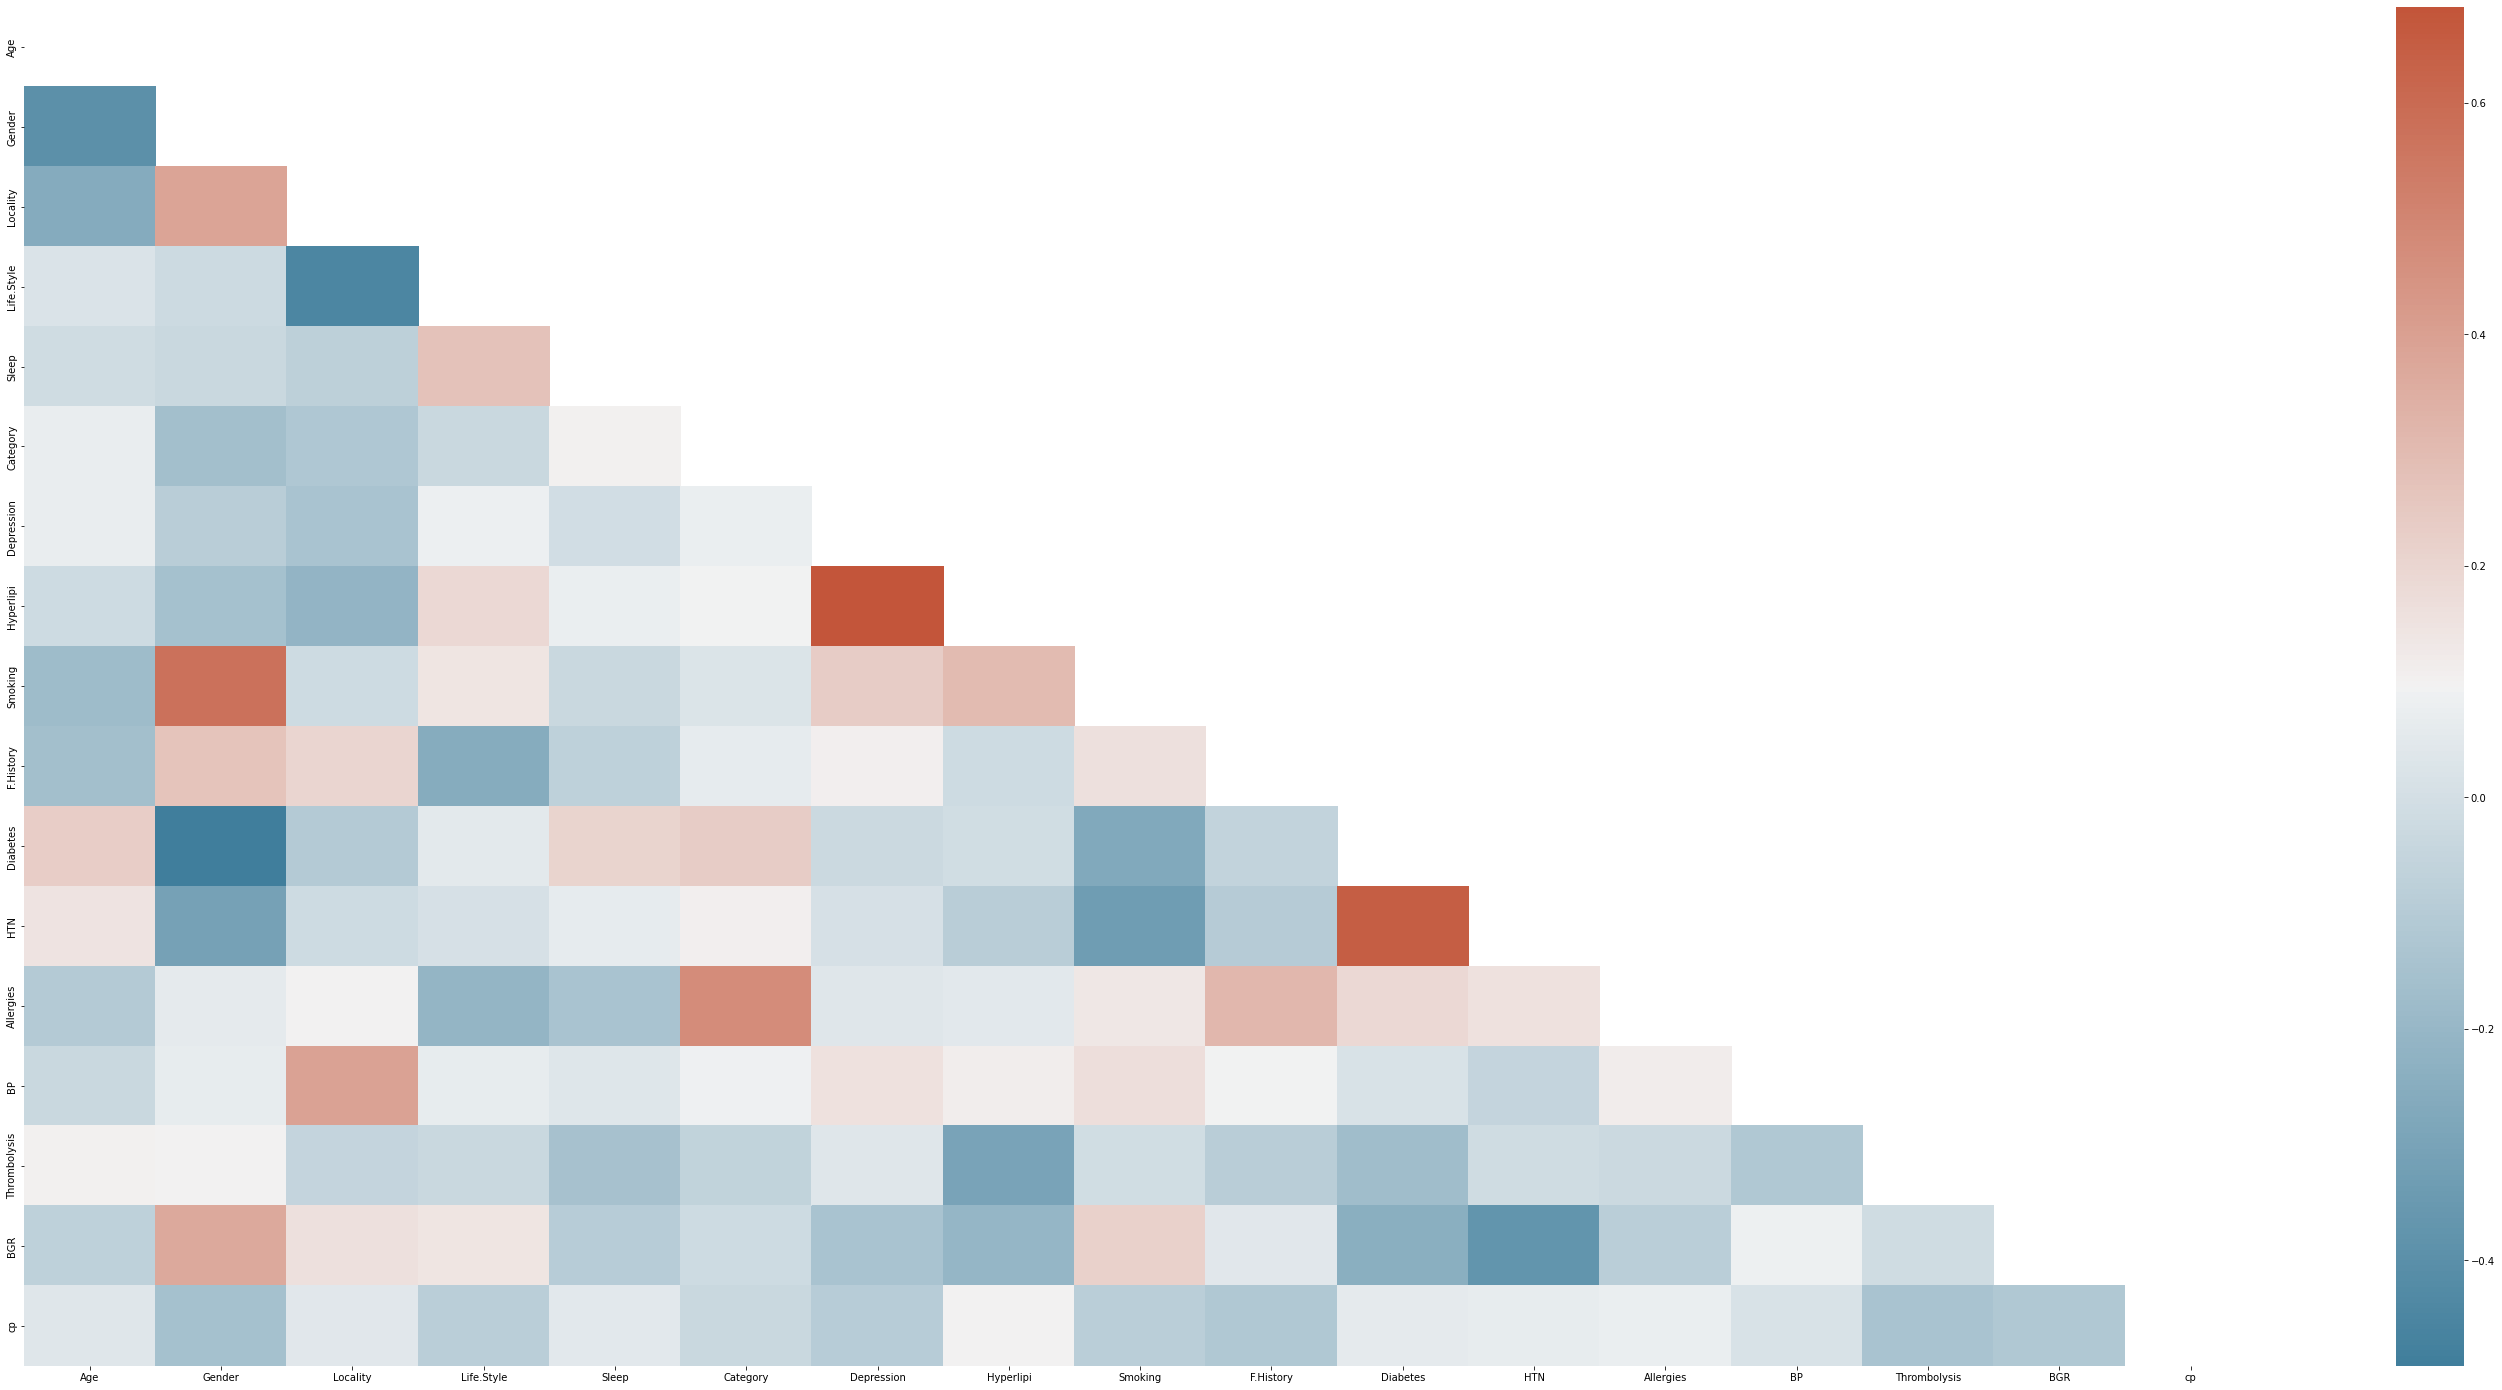

In [148]:
corr_matrix = x.corr()
f, ax = plt.subplots(figsize=(50, 25))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap)

In [149]:
correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

set()


In [150]:
x2 = x.drop(labels=correlated_features, axis=1)

In [ ]:
#x2 = x.copy()

In [151]:
x2.shape

(368, 17)

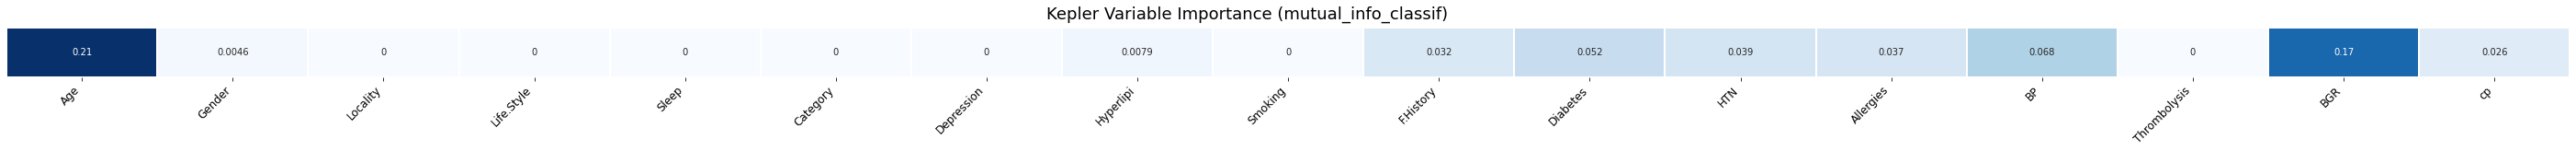

In [152]:
kepler_mutual_information = mutual_info_classif(x2, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(x2.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

## Split

In [153]:
x2.columns

Index(['Age', 'Gender', 'Locality', 'Life.Style', 'Sleep', 'Category',
       'Depression', 'Hyperlipi', 'Smoking', 'F.History', 'Diabetes', 'HTN',
       'Allergies', 'BP', 'Thrombolysis', 'BGR', 'cp'],
      dtype='object')

In [154]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [155]:
# Primeiro vamos separar em treino e teste para conseguir avaliar melhor o nosso modelo

X_train,X_test,y_train,y_test=train_test_split(x2,y,test_size=.2,random_state=1)

In [156]:
X_train.shape

(294, 17)

# Avaliando a Performance

## Acurácia - Validação Cruzada

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

cross_val_score(model_KNN, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.8164815897136177

In [159]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=42)
model_DecisionTree.fit(X_train, y_train)

cross_val_score(model_DecisionTree, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9523670368205727

In [160]:
# Random Forest

model_RandomForest = RandomForestClassifier(random_state=42)
model_RandomForest.fit(X_train, y_train)

cross_val_score(model_RandomForest, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9693746347165402

In [161]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

model_LogisticRegression = LogisticRegression(random_state=42)
model_LogisticRegression.fit(X_train, y_train)

cross_val_score(model_LogisticRegression, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.8265341905318527

In [162]:
# Light GBM

model_LightGBM = lgb.LGBMClassifier(random_state=42)
model_LightGBM.fit(X_train, y_train)

cross_val_score(model_LightGBM, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9489187609585038

In [163]:
# XGBoost

model_XGBoost = xgb.XGBClassifier(random_state=42)
model_XGBoost.fit(X_train, y_train)

cross_val_score(model_XGBoost, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9524254821741671

## Matriz de Confusão

In [164]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

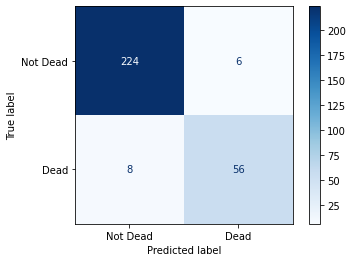

In [170]:
# Decision Tree
y_train_pred_DT = cross_val_predict(model_DecisionTree,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_DT) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Not Dead', 'Dead'])
disp.plot(cmap='Blues')


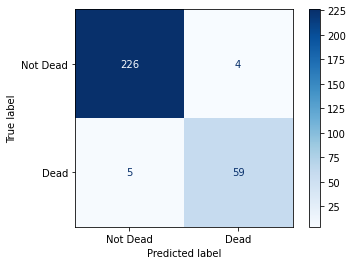

In [171]:
# Random Forest
y_train_pred_RF = cross_val_predict(model_RandomForest,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_RF) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Not Dead', 'Dead'])
disp.plot(cmap='Blues')


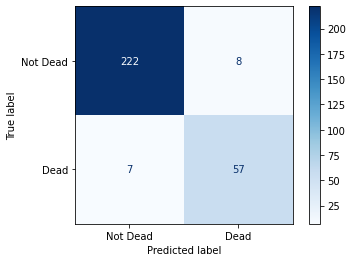

In [172]:
# Light GBM
y_train_pred_LGBM = cross_val_predict(model_LightGBM,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_LGBM) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Not Dead', 'Dead'])
disp.plot(cmap='Blues')


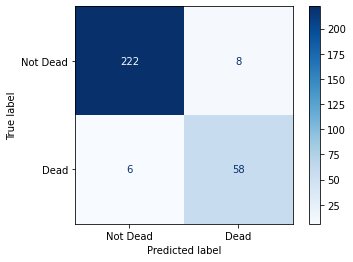

In [173]:
# XGBoost
y_train_pred_XGB = cross_val_predict(model_XGBoost,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_XGB) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Not Dead', 'Dead'])
disp.plot(cmap='Blues')


## Precisão, Sensibilidade (Recall) e F1 Score

In [174]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [175]:
# Decision Tree
print("Precisão: {}".format(precision_score(y_train, y_train_pred_DT)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_DT)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_DT)))

Precisão: 0.9032258064516129
Sensibilidade: 0.875
F1 Score: 0.8888888888888888


In [176]:
# Random Forest
print("Precisão: {}".format(precision_score(y_train, y_train_pred_RF)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_RF)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_RF)))

Precisão: 0.9365079365079365
Sensibilidade: 0.921875
F1 Score: 0.9291338582677166


In [177]:
# Light GBM
print("Precisão: {}".format(precision_score(y_train, y_train_pred_LGBM)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_LGBM)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_LGBM)))

Precisão: 0.8769230769230769
Sensibilidade: 0.890625
F1 Score: 0.883720930232558


In [178]:
# XGBoost
print("Precisão: {}".format(precision_score(y_train, y_train_pred_XGB)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_XGB)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_XGB)))

Precisão: 0.8787878787878788
Sensibilidade: 0.90625
F1 Score: 0.8923076923076922


## Precision/Recall Tradeoff

### Decision Tree

In [179]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_DT = cross_val_predict(model_DecisionTree, X_train, y_train, cv=3, method='predict_proba')[:,1] 

In [180]:
#y_scores = model_LightGBM.predict_proba(X_train)[:,1]


In [181]:
from sklearn.metrics import precision_recall_curve

In [182]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_DT)

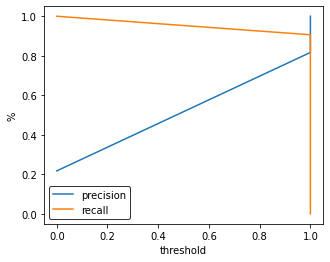

In [183]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_DT) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

### Random Forest

In [188]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_RF = cross_val_predict(model_RandomForest, X_train, y_train, cv=3, method='predict_proba')[:,1] 

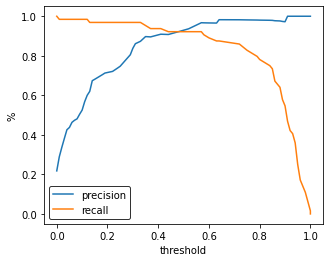

In [189]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_RF) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

### Light  GBM

In [190]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores = cross_val_predict(model_LightGBM, X_train, y_train, cv=3, method='predict_proba')[:,1] 

In [191]:
#y_scores = model_LightGBM.predict_proba(X_train)[:,1]


In [192]:
from sklearn.metrics import precision_recall_curve

In [193]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores)

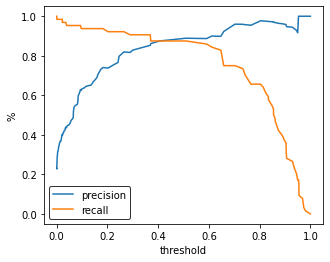

In [194]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

### XGBoost

In [199]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_XGB = cross_val_predict(model_XGBoost, X_train, y_train, cv=3, method='predict_proba')[:,1] 

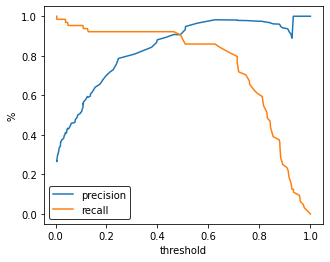

In [200]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_XGB) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

## Curva ROC

### Decision Tree

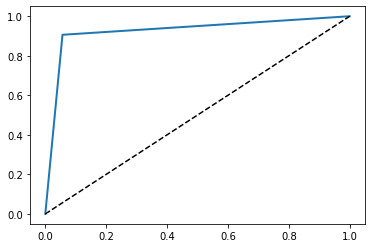

In [205]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_DT)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [206]:
roc_auc_score(y_train, y_scores_DT)

0.9248641304347825

### Random Forest

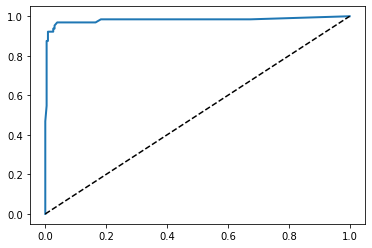

In [207]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_RF)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [208]:
roc_auc_score(y_train, y_scores_RF)

0.9807744565217391

### Light GBM

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score

In [210]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

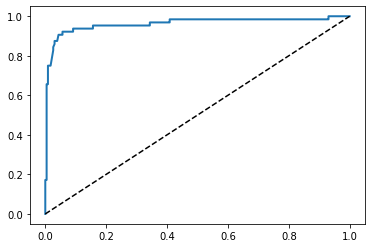

In [211]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [212]:
roc_auc_score(y_train, y_scores)

0.96171875

### XGBoost

In [213]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_XGB)

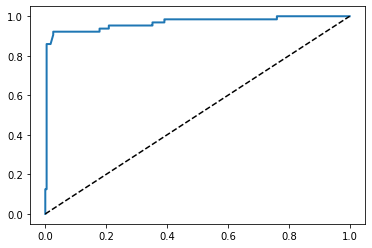

In [214]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()

In [215]:
roc_auc_score(y_train, y_scores_XGB)

0.965828804347826

# Otimização de Hiperparâmetros

## Random Search

### Random Forest

In [216]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000]}
          
clf = RandomizedSearchCV(model_RandomForest,parameters,n_iter=100,
                         random_state=42)

clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42)

In [217]:
clf.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [218]:
# Random Forest

model_RandomForest = RandomForestClassifier(random_state=42,
                                            n_estimators= 800,
                                            min_samples_split= 2,
                                            min_samples_leaf= 1,
                                            max_features= 'sqrt',
                                            max_depth= 10,
                                            bootstrap= False)
model_RandomForest.fit(X_train, y_train)

cross_val_score(model_RandomForest, X_train, y_train,cv=5, scoring='accuracy').mean() 

0.9762127410870836

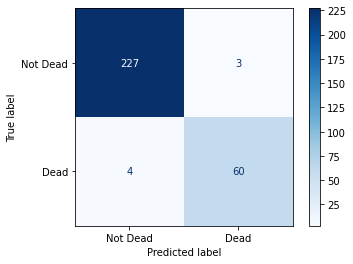

In [219]:
# Random Forest
y_train_pred_RF = cross_val_predict(model_RandomForest,X_train,y_train, cv=5)

cm_crossValidation = confusion_matrix(y_train, y_train_pred_RF) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_crossValidation, display_labels=['Not Dead', 'Dead'])
disp.plot(cmap='Blues')


In [220]:
# Random Forest
print("Precisão: {}".format(precision_score(y_train, y_train_pred_RF)))
print("Sensibilidade: {}".format(recall_score(y_train, y_train_pred_RF)))
print("F1 Score: {}".format(f1_score(y_train, y_train_pred_RF)))

Precisão: 0.9523809523809523
Sensibilidade: 0.9375
F1 Score: 0.9448818897637795


In [221]:
# [:,1] é para selecionar apenas as probabilidades de target =1
y_scores_RF = cross_val_predict(model_RandomForest, X_train, y_train, cv=3, method='predict_proba')[:,1] 

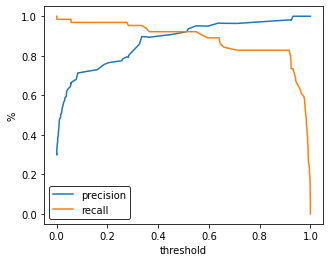

In [222]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_scores_RF) 
thresholds = np.append(thresholds, 1) 

fig, ax = plt.subplots(figsize =[5, 4])
plt.plot(thresholds, precisions, color=sns.color_palette()[0]) 
plt.plot(thresholds, recalls, color=sns.color_palette()[1]) 

leg = plt.legend(('precision', 'recall'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')
plt.show()

In [223]:
roc_auc_score(y_train, y_scores_RF)

0.984375

# Random Forest

In [224]:
# Random Forest

model_RandomForest = RandomForestClassifier(random_state=42,
                                            n_estimators= 800,
                                            min_samples_split= 2,
                                            min_samples_leaf= 1,
                                            max_features= 'sqrt',
                                            max_depth= 10,
                                            bootstrap= False)
model_RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       n_estimators=800, random_state=42)

In [225]:
y_scores_pred_RF = model_RandomForest.predict_proba(X_test)[:,1] 

In [226]:
pred_RF = model_RandomForest.predict(X_test)


In [236]:
# Random Forest
print("Acurácia: {:.2f}".format(accuracy_score(y_test, pred_RF)))
print("Precisão: {}".format(precision_score(y_test, pred_RF)))
print("Sensibilidade: {}".format(recall_score(y_test, pred_RF)))
print("F1 Score: {}".format(f1_score(y_test, pred_RF)))

Acurácia: 0.95
Precisão: 0.875
Sensibilidade: 0.875
F1 Score: 0.875


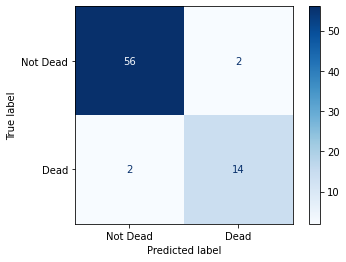

In [232]:
cm_RF = confusion_matrix(y_test, pred_RF) # Matriz de Confusão

# Plotando a Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=['Not Dead', 'Dead'])
disp.plot(cmap='Blues')


In [233]:
print(classification_report(y_test, pred_RF, target_names=['Not Dead', 'Dead']))


              precision    recall  f1-score   support

    Not Dead       0.97      0.97      0.97        58
        Dead       0.88      0.88      0.88        16

    accuracy                           0.95        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.95      0.95      0.95        74



In [234]:
# AUC Treino
roc_auc_score(y_train, y_scores_RF)

0.984375

In [235]:

# AUC Teste
roc_auc_score(y_test, y_scores_pred_RF)

0.9849137931034483

# Shap

In [ ]:
!pip install git+https://github.com/slundberg/shap -q

In [239]:
import shap

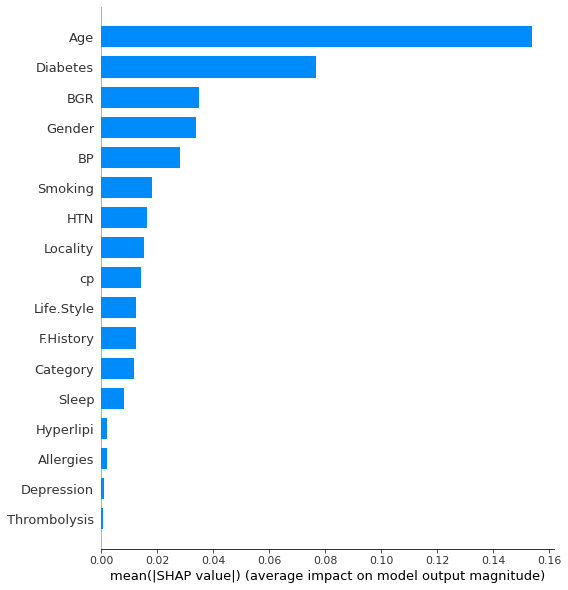

In [240]:
explainer = shap.TreeExplainer(model_RandomForest)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train, plot_type='bar', max_display=30)